In [85]:
#### Kyle Territo ####
#### Homework  #2 ####

In [86]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [87]:
#Importing Excel file
df = pd.read_excel('Data Plant.xlsx')
#print(df)

In [88]:
#Describing the data
df.describe()

,39527.250000,27.466360,27.628910,8.822266,5.396484,1691.651001,7.366691,78.552643,13.514650,36.843750,...,3.066406,55.951462,71.275284,30.659370,30.592581,375845.312500,45.991550,3.265625,2.267400,1.721600
count,7199.000000,7198.000000,7198.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,...,7199.000000,7198.000000,7199.000000,7199.000000,7198.000000,7199.000000,7199.000000,7199.000000,7198.000000,7197.000000
mean,39534.750000,27.127295,27.953209,9.593198,6.395699,1701.915367,11.555007,76.332696,18.356032,37.815861,...,3.620778,52.985809,70.771369,30.648593,30.609367,386035.274322,45.167884,3.841032,2.114043,0.692348
std,4.329826,0.674680,0.698533,0.630545,0.952640,99.738546,2.901431,3.595688,3.648891,1.768092,...,0.623456,1.915064,1.725054,0.192165,0.194832,18811.255389,14.682053,0.619553,0.637675,17.474702
min,39527.252083,24.231501,24.593750,7.673828,4.951172,687.060486,6.780738,18.643391,8.441406,35.882809,...,2.455078,47.744381,0.000000,29.974609,30.035160,236985.406250,12.223560,0.000000,-8.956800,-320.799988
25%,39531.001042,26.652867,27.507811,9.191404,5.640625,1659.447998,9.108021,74.057091,15.921870,37.166019,...,3.158203,51.530783,71.275284,30.534136,30.497549,375581.046875,38.216480,3.388672,1.930599,1.390500
50%,39534.750000,27.109890,27.906250,9.570802,6.177734,1697.920044,11.137910,76.542381,19.292971,37.535160,...,3.511719,53.136414,71.275284,30.603519,30.573830,386836.500000,47.806690,3.737500,2.160500,1.642300
75%,39538.498958,27.518567,28.394529,9.923826,6.958984,1751.557495,13.789635,78.800842,21.316410,37.904301,...,4.030078,54.495871,71.275284,30.724609,30.679689,397080.296875,55.019815,4.246094,2.328500,1.789600
max,39542.247917,47.017712,42.443359,17.277340,19.515141,2235.039062,26.766680,84.796471,29.253910,64.715332,...,15.594240,57.336620,71.275284,31.686710,31.644920,643457.375000,90.493187,14.015130,4.172300,135.899994


In [89]:
#Sizing the data frame
df.shape

(7199, 27)

In [90]:
#Looking for empty cells
df.isnull().sum().sum()

11

In [91]:
#Replacing empty cells with mean value
df_mean = df.fillna(df.mean(), inplace= True)

In [92]:
#Double checking that replacements were successful
df.isnull().sum().sum()

0

In [93]:
#df.head(10)

In [94]:
#Splitting data
x_train, x_test = train_test_split(df, test_size = 0.15, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.15, random_state=42)

In [95]:
#Printing lenghts of data split
#... for some reason not a perfect split
print(len(x_train2))
print(len(x_test))
print(len(x_val))

5201
1080
918


In [96]:
#Normalizing the data set
scaler = StandardScaler().fit(x_train2)
df_scaled = scaler.transform(x_train2)
df_scaled

c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


array([[ 1.23529493e+00, -1.48480251e-01, -2.95567064e-01, ...,
         1.74895159e-01,  5.44527287e-01,  1.20354690e-03],
       [-9.26570917e-01,  2.50724342e-01,  8.06140654e-01, ...,
        -1.42912563e-01,  1.08242816e-01,  3.81010449e-02],
       [-1.38858243e-01,  4.58450901e-02,  2.58197104e-01, ...,
        -1.05858087e+00,  3.22088448e-01,  6.19891216e-02],
       ...,
       [-7.34952086e-01, -6.83892991e-01, -3.17429247e-01, ...,
         1.85519197e+00,  1.09948892e+00,  4.04940141e-02],
       [-5.87738627e-01, -1.28867778e-02, -1.55667310e-01, ...,
        -9.10689228e-01, -2.24118208e-01,  6.53323429e-02],
       [ 8.05238566e-01,  1.55065943e+00,  1.58141846e+00, ...,
        -1.00823491e+00, -1.91257663e+00,  2.90771232e-02]])

In [97]:
#Transforming the data set to logarithmic
def log_transform(x):
    return np.log(x + 1)

df_log = log_transform(df_scaled)
df_log

C:\Users\kterri3\AppData\Local\Temp\ipykernel_9956\2800859584.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x + 1)


array([[ 8.04373181e-01, -1.60732587e-01, -3.50362146e-01, ...,
         1.61178918e-01,  4.34717900e-01,  1.20282322e-03],
       [-2.61143519e+00,  2.23722857e-01,  5.91192334e-01, ...,
        -1.54215339e-01,  1.02775712e-01,  3.73931258e-02],
       [-1.49496145e-01,  4.48252572e-02,  2.29679826e-01, ...,
                    nan,  2.79212644e-01,  6.01436794e-02],
       ...,
       [-1.32784466e+00, -1.15167449e+00, -3.81889090e-01, ...,
         1.04913908e+00,  7.41693942e-01,  3.96956140e-02],
       [-8.86097730e-01, -1.29705327e-02, -1.69208680e-01, ...,
        -2.41563317e+00, -2.53755101e-01,  6.32868095e-02],
       [ 5.90692752e-01,  9.36351924e-01,  9.48339038e-01, ...,
                    nan,             nan,  2.86624037e-02]])

In [98]:
#2-D projection using the first two PCs
DPCA = PCA(n_components=2)
df_pca = DPCA.fit_transform(df_scaled)
df_pca

array([[ 1.5039946 , -4.35377844],
       [ 0.22268217,  0.62310545],
       [-2.59949279,  0.02921552],
       ...,
       [ 2.6172706 ,  4.35527319],
       [-0.33821788,  1.11531801],
       [ 0.164476  , -5.72882314]])

Text(0.5, 1.0, 'Principal Component Analysis')

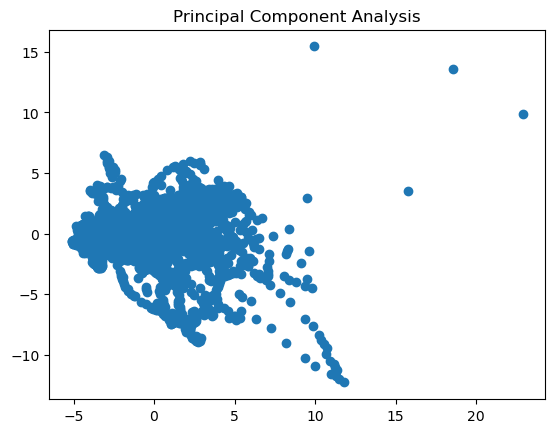

In [99]:
#Plotting PCA results
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.title("Principal Component Analysis")

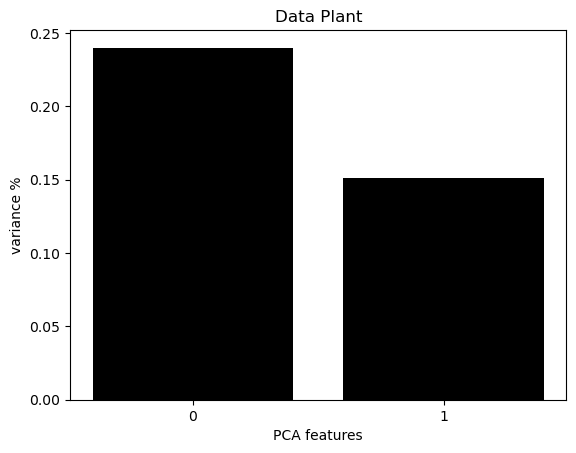

In [100]:
features = range(DPCA.n_components_)
plt.bar(features, DPCA.explained_variance_ratio_, color='black')
plt.title("Data Plant")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()